In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from equalizer import Equalizer
import numpy as np

In [58]:
eq = Equalizer(2, 8)

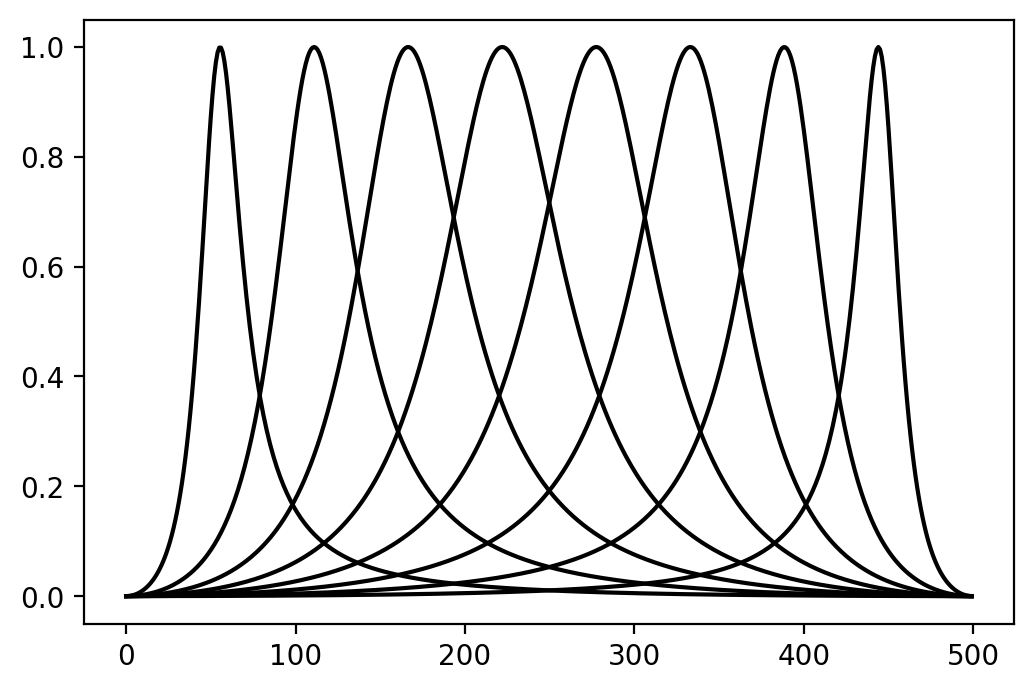

In [59]:
eq.plot_freq_response()

In [60]:
eq.set_gains(-np.ones(8))

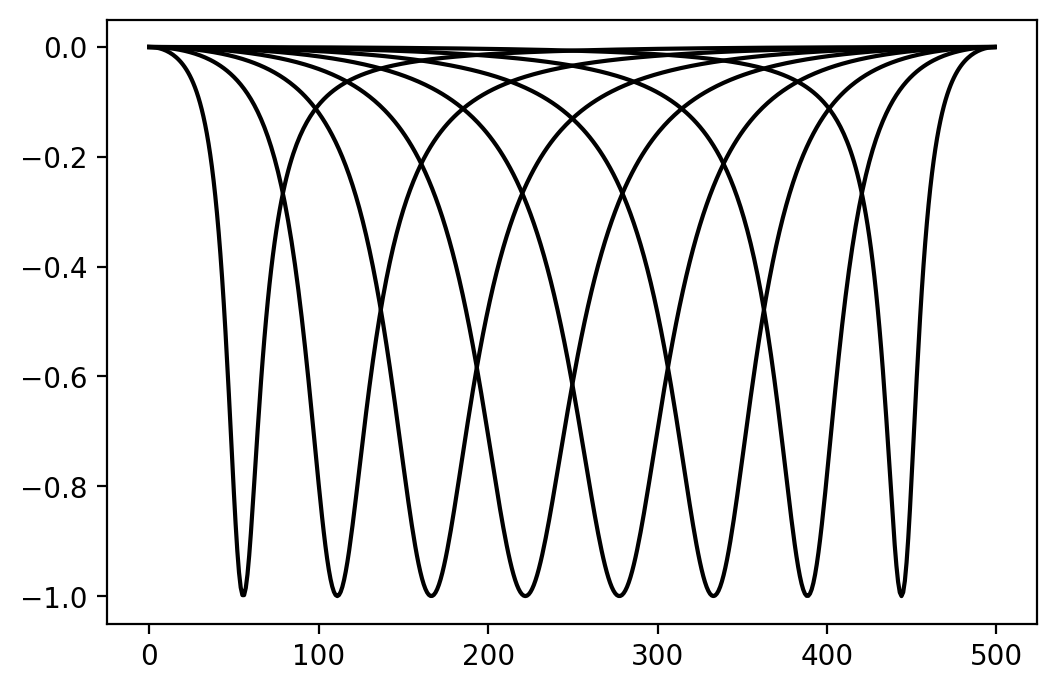

In [61]:
eq.plot_freq_response()

In [63]:
eq.set_gains(-np.random.randint(-3, 4, 8))

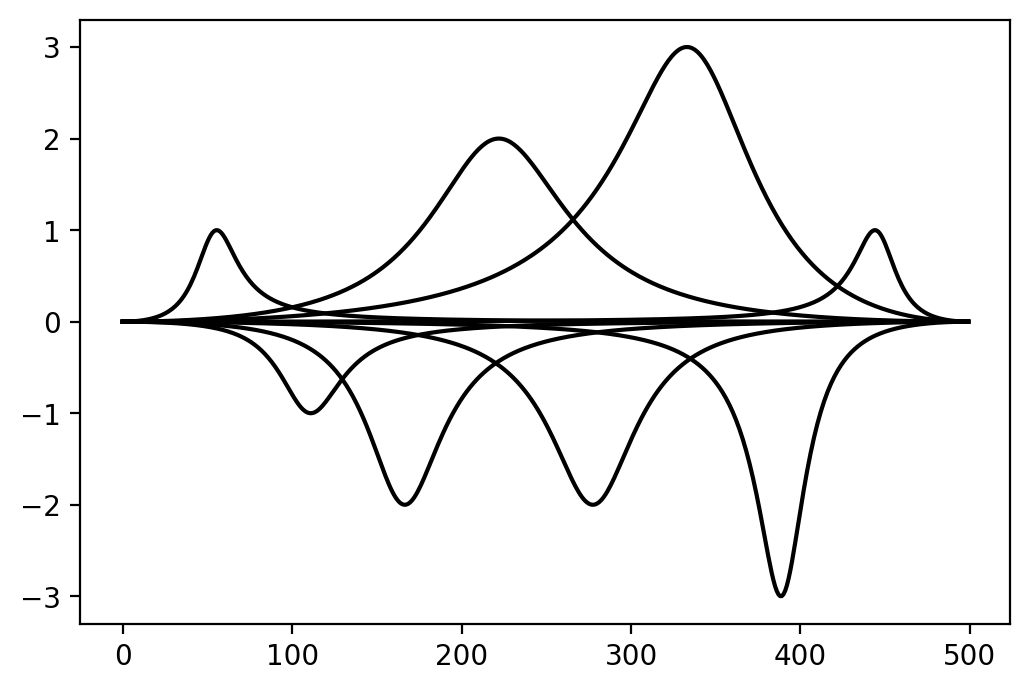

In [64]:
eq.plot_freq_response()

In [65]:
import numpy as np
from sympy import Poly, symbols, simplify, fraction
from sympy.abc import x
import sympy
from filters import compute_h_z, filter_b_a
import matplotlib.pyplot as plt
import scipy.signal as scisig

In [67]:
s, z = symbols('s, z')
X = np.random.randn(int(1e7))
unit_circle = np.exp(1j * np.linspace(0, 2 * np.pi, 1000))
for b, a, w0 in zip(eq.eq_b, eq.eq_a, eq.frequencies):
    h_s = (b[0]*s**2 + b[1]*s + b[2])/(a[0]*s**2 + a[1]*s + a[2])
    h_z = simplify(h_s.subs(s, (1/np.tan(w0/2))*(1-z**(-1))/(1+z**(-1))))
    num, den = fraction(h_z)
    num_coeffs = np.array(Poly(num, z).all_coeffs()).astype(float)
    den_coeffs = np.array(Poly(den, z).all_coeffs()).astype(float)
    X = scisig.lfilter(num_coeffs, den_coeffs, X)
    h_z_emp = compute_h_z(den_coeffs, num_coeffs, unit_circle)

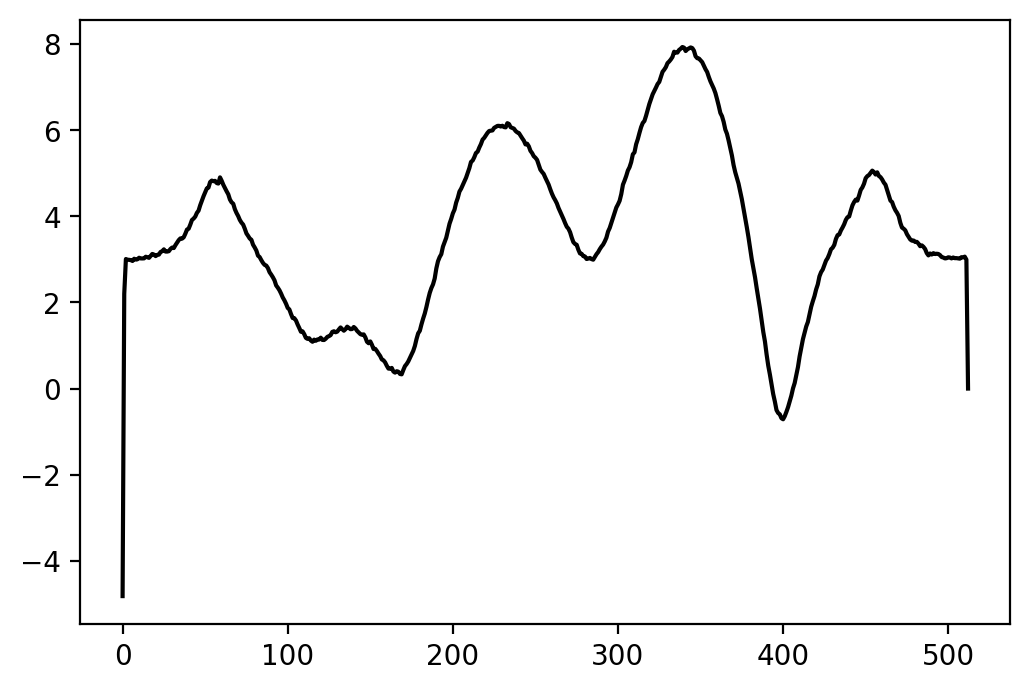

In [70]:
plt.figure(dpi=100)
f, Pxx = scisig.welch(X, nperseg=1024)
plt.plot(10*np.log10(np.abs(Pxx)), c = 'k')